## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

In [ ]:
df_info = pd.read_csv('lending_club_info.csv')
df = pd.read_csv('lending_club_loan_two.csv')

In [ ]:
def information(string):
  print(df_info[df_info['LoanStatNew']==string]['Description'])

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## Exploratory Data Analysis

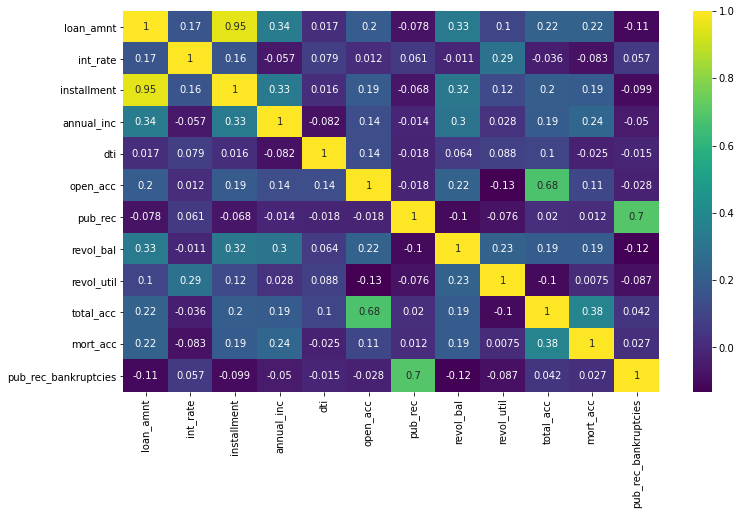

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

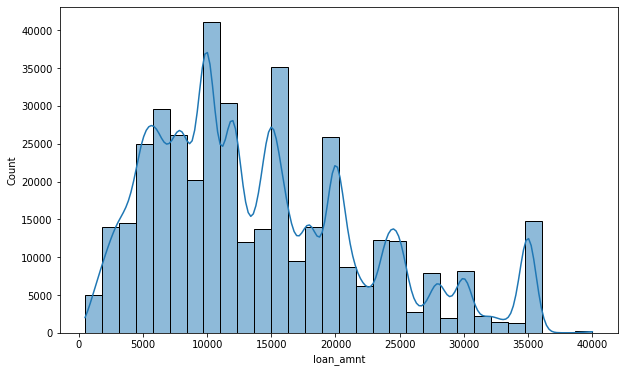

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['loan_amnt'],bins=30,kde=True)

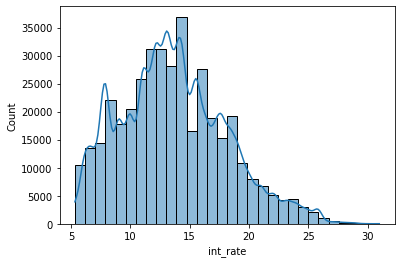

In [ ]:
sns.histplot(df['int_rate'],bins=30,kde=True)

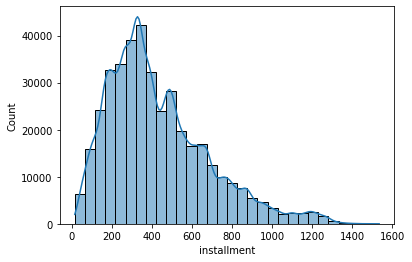

In [ ]:
sns.histplot(df['installment'],bins=30,kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


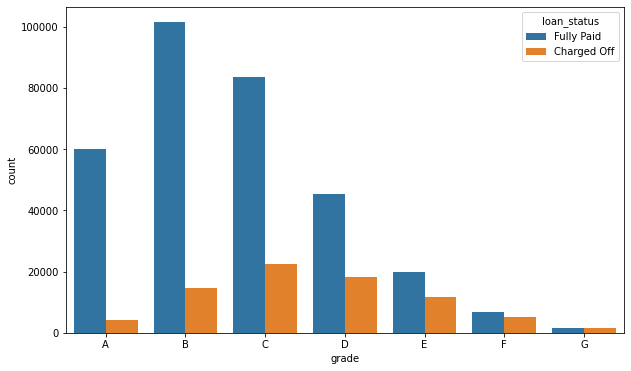

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['grade'].sort_values(),hue=df['loan_status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


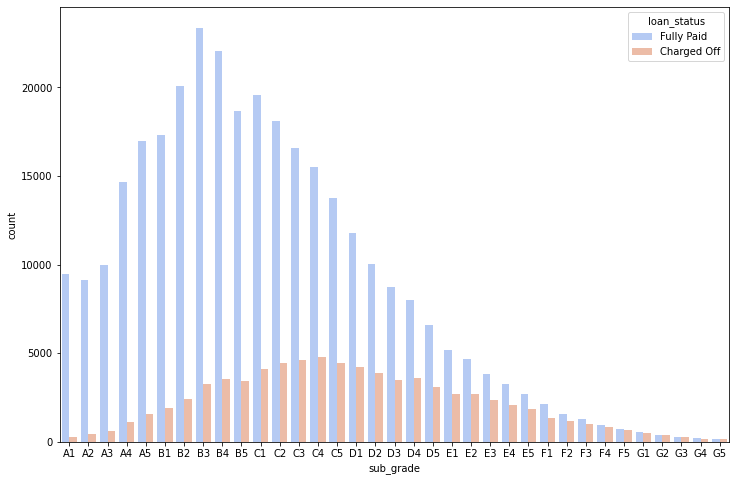

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['sub_grade'].sort_values(),hue=df['loan_status'],palette='coolwarm')

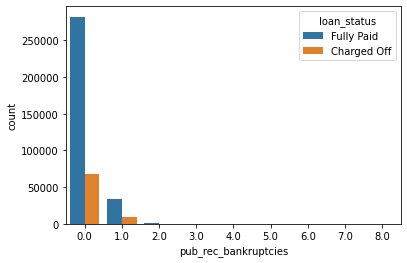

In [ ]:
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


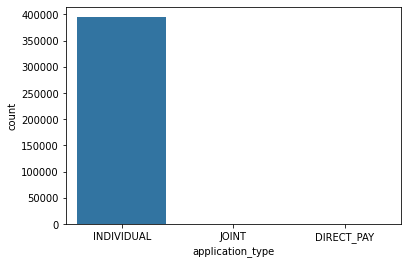

In [ ]:
sns.countplot(df['application_type'])

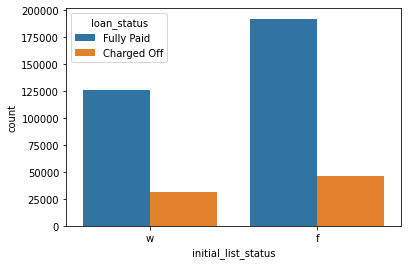

In [ ]:
sns.countplot(x='initial_list_status',hue='loan_status',data=df)

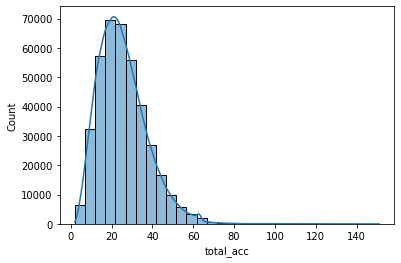

In [ ]:
sns.histplot(df['total_acc'],bins=30,kde=True)

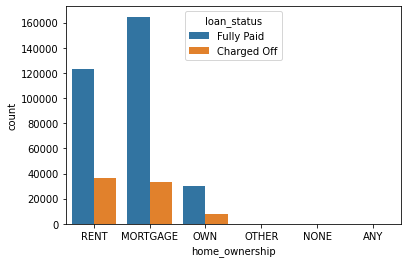

In [ ]:
sns.countplot(x='home_ownership',data=df,hue='loan_status')

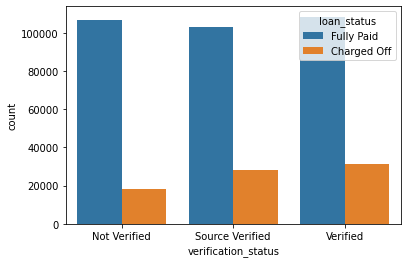

In [ ]:
sns.countplot(x='verification_status',data=df,hue='loan_status')

In [ ]:
df['issue_year'] = df['issue_d'].apply(lambda x:x[x.index('-')+1:])
df['issue_month'] = df['issue_d'].apply(lambda x:x[:x.index('-')])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


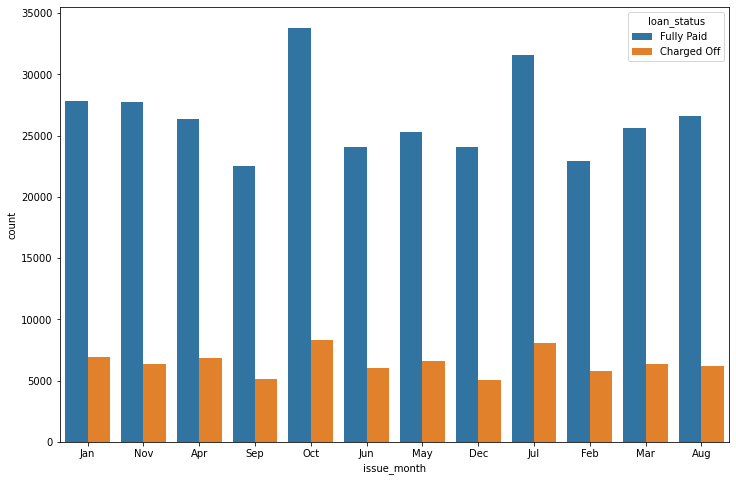

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['issue_month'],hue=df['loan_status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


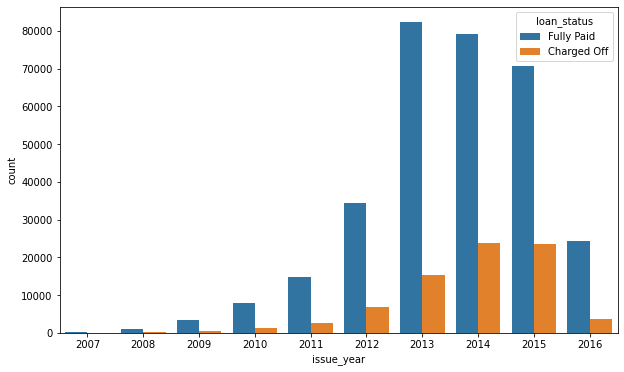

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['issue_year'].sort_values(),hue=df['loan_status'])

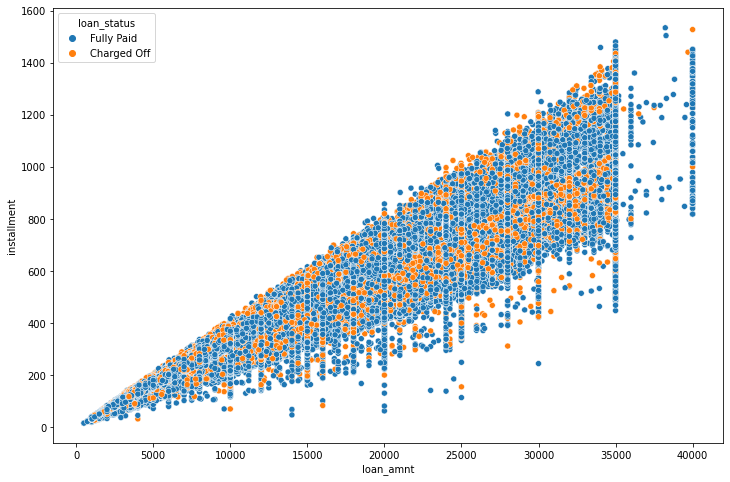

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='loan_amnt',y='installment',data=df,hue='loan_status')

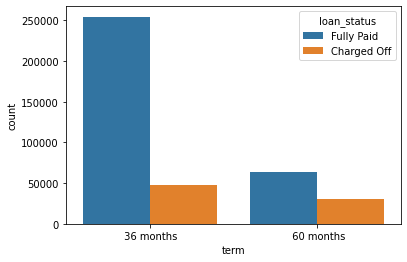

In [ ]:
sns.countplot(x='term',hue='loan_status',data=df)

## Data PreProcessing

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_year,issue_month
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",2015,Jan
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",2015,Jan
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",2015,Jan
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",2014,Nov
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",2013,Apr


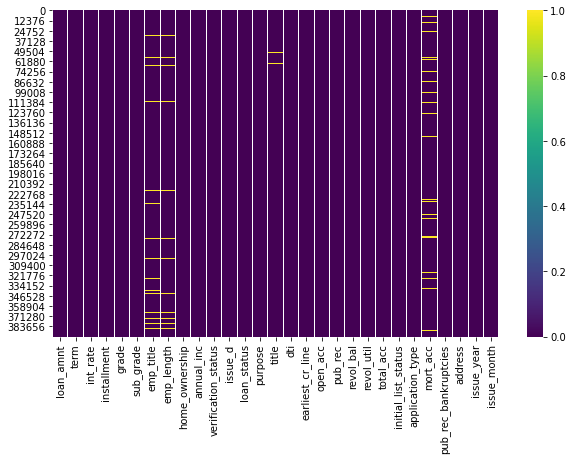

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis')

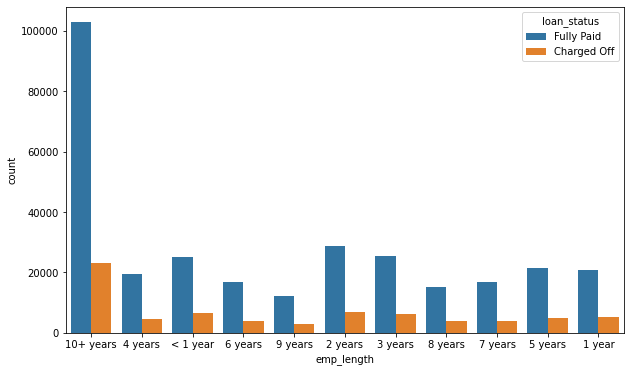

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length',hue='loan_status',data=df)

In [ ]:
df['emp_title'].value_counts()

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
Quality Custom Distribution          1
Burrtec Waste Industries, inc.       1
patient representative               1
nursing services                     1
Holiday Stationstores                1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
df = df.drop(['emp_title','emp_length'],axis=1)

In [ ]:
df.groupby('total_acc').mean()['mort_acc']
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [ ]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
df = df.drop('title',axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
issue_year                0
issue_month               0
dtype: int64

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_year,issue_month
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",2015,Jan
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",2015,Jan
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",2015,Jan
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",2014,Nov
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",2013,Apr


In [ ]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [ ]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [ ]:
# Or just use .map()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [ ]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [ ]:
def func(num):
  if num==36:
    return 0
  else:
    return 1

In [ ]:
df['term'] = df['term'].apply(lambda x:func(x))

In [ ]:
df = df.drop('grade',axis=1)

In [ ]:
dummy = pd.get_dummies(df['sub_grade'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('sub_grade',axis=1),dummy],axis=1)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
dummy = pd.get_dummies(df['home_ownership'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('home_ownership',axis=1),dummy],axis=1)

In [ ]:
dummy = pd.get_dummies(df['verification_status'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('verification_status',axis=1),dummy],axis=1)

In [ ]:
df = df.drop('issue_d',axis=1)

In [ ]:
dummy = pd.get_dummies(df['purpose'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('purpose',axis=1),dummy],axis=1)

In [ ]:
df = df.drop('earliest_cr_line',axis=1)

In [ ]:
def func(s):
  if s=='f':
    return 1
  else:
    return 0

In [ ]:
df['initial_list_status'] = df['initial_list_status'].apply(lambda x:func(x))

In [ ]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [ ]:
dummy = pd.get_dummies(df['application_type'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('application_type',axis=1),dummy],axis=1)

In [ ]:
df['loan_status'].value_counts()

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'issue_year', 'issue_month', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'MORTGAGE', 'NONE', 'OTHER', 'OWN',
       'RENT', 'Source Verified', 'Verified', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'INDIVIDUAL', 'JOINT'],
      dtype='object')

In [ ]:
dummy = pd.get_dummies(df['issue_month'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('issue_month',axis=1),dummy],axis=1)

In [ ]:
dummy = pd.get_dummies(df['issue_year'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('issue_year',axis=1),dummy],axis=1)

### Splitting into train,cross-validation and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def func(string):
  if string == 'Fully Paid':
    return 1
  else:
    return 0

In [ ]:
df['loan_status'] = df['loan_status'].apply(lambda x:func(x))

In [ ]:
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

In [ ]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=101)

In [107]:
print('Training dataset: ',len(X_train))
print('Cross-Validation dataset: ',len(X_cv))
print('Testing dataset: ',len(X_test))

Training dataset:  221322
Cross-Validation dataset:  94853
Testing dataset:  79044


In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler()

In [110]:
X_train = scaler.fit_transform(X_train)

In [111]:
X_train = scaler.transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

## Creating and Training model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [112]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [130]:
model = Sequential()

model.add(Dense(99,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(48,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(21,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(12,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_cv,y_cv),epochs=100,verbose=1,callbacks=[earlystop])

Epoch 1/100
6917/6917 [==============================] - 14s 2ms/step - loss: 0.3117 - accuracy: 0.8740 - val_loss: 0.2860 - val_accuracy: 0.8878
Epoch 2/100
6917/6917 [==============================] - 13s 2ms/step - loss: 0.2624 - accuracy: 0.8879 - val_loss: 0.2820 - val_accuracy: 0.8862
Epoch 3/100
6917/6917 [==============================] - 13s 2ms/step - loss: 0.2578 - accuracy: 0.8897 - val_loss: 0.2825 - val_accuracy: 0.8831
Epoch 4/100
6917/6917 [==============================] - 13s 2ms/step - loss: 0.2602 - accuracy: 0.8878 - val_loss: 0.2871 - val_accuracy: 0.8741
Epoch 5/100
6917/6917 [==============================] - 13s 2ms/step - loss: 0.2589 - accuracy: 0.8883 - val_loss: 0.2973 - val_accuracy: 0.8689
Epoch 6/100
6917/6917 [==============================] - 13s 2ms/step - loss: 0.2575 - accuracy: 0.8887 - val_loss: 0.3062 - val_accuracy: 0.8687
Epoch 7/100
6917/6917 [==============================] - 13s 2ms/step - loss: 0.2567 - accuracy: 0.8893 - val_loss: 0.3232 -

In [ ]:
model.save('lending_club_model.h5')

In [125]:
loss_df = pd.DataFrame(model.history.history)

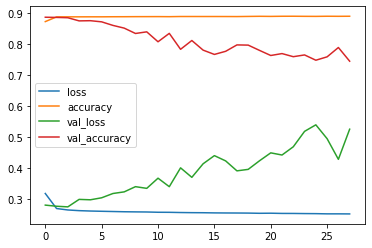

In [131]:
loss_df.plot()

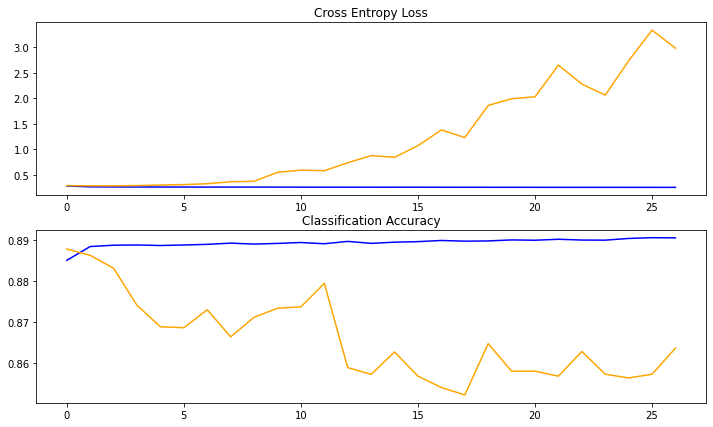

In [132]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
                
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')

In [133]:
val_loss,val_acc = model.evaluate(X_test,y_test)

2471/2471 [==============================] - 2s 882us/step - loss: 3.0397 - accuracy: 0.8621


In [134]:
print(val_loss)
print(val_acc)

3.0397469997406006
0.8620514869689941


In [135]:
pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [136]:
print(accuracy_score(pred,y_test))
print()
print(confusion_matrix(pred,y_test))
print()
print(classification_report(pred,y_test))

0.8620515156115581

[[ 6901  2147]
 [ 8757 61239]]

              precision    recall  f1-score   support

           0       0.44      0.76      0.56      9048
           1       0.97      0.87      0.92     69996

    accuracy                           0.86     79044
   macro avg       0.70      0.82      0.74     79044
weighted avg       0.91      0.86      0.88     79044

